In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
# Task 1a: Average Suicides (Overall)

avg_suicides = df['suicides_no'].mean()
print(f"1a. Average suicides (all years): {avg_suicides:.2f}")

1a. Average suicides (all years): 242.57


In [4]:
# Task 1b: Average Suicides in 2010

avg_2010 = df[df['year'] == 2010]['suicides_no'].mean()
print(f"1b. Average suicides in 2010: {avg_2010:.2f}")

1b. Average suicides in 2010: 226.04


In [5]:
# Task 1c: Average Suicides by Gender

gender_avg = df.groupby('sex')['suicides_no'].mean()
print("1c. Average suicides by gender:\n", gender_avg)

1c. Average suicides by gender:
 sex
female    112.114306
male      373.034508
Name: suicides_no, dtype: float64


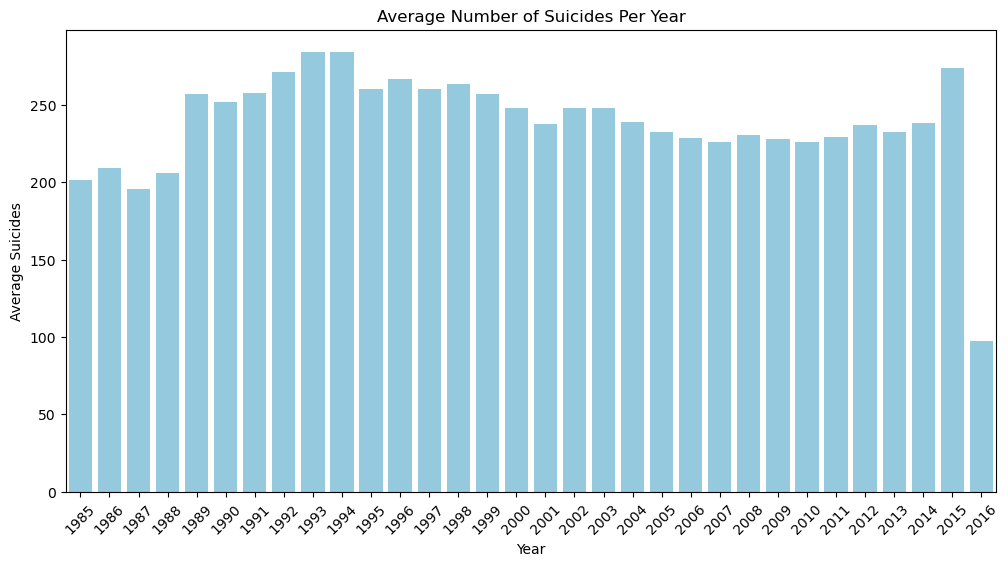

In [6]:
# 2. Bar plot of years vs. average number of suicides
plt.figure(figsize=(12, 6))
yearly_avg_suicides = df.groupby("year")["suicides_no"].mean()
sns.barplot(x=yearly_avg_suicides.index, y=yearly_avg_suicides.values, color="skyblue")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Average Suicides")
plt.title("Average Number of Suicides Per Year")
plt.show()


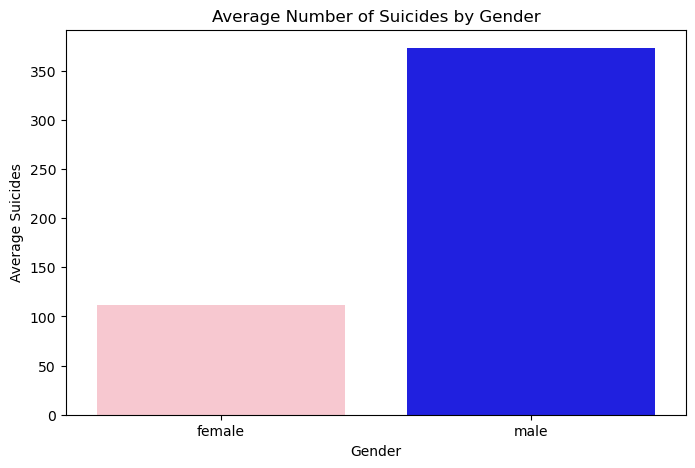

In [7]:
# 3. Compare suicide rates in Males vs Females using a bar plot
avg_suicides_by_gender = df.groupby("sex")["suicides_no"].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_suicides_by_gender.index, y=avg_suicides_by_gender.values, palette=["pink", "blue"])
plt.xlabel("Gender")
plt.ylabel("Average Suicides")
plt.title("Average Number of Suicides by Gender")
plt.show()

<Figure size 1000x600 with 0 Axes>

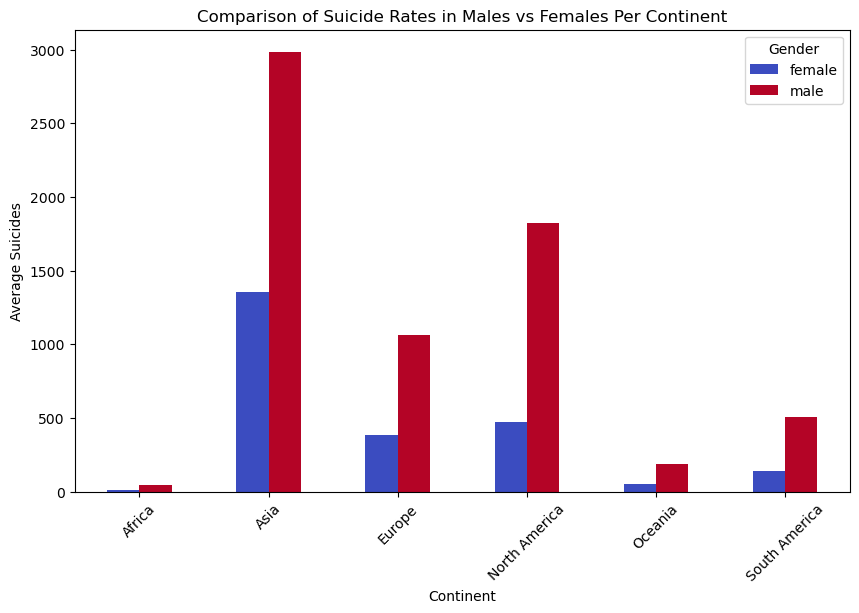

In [14]:
# 4. Compare male vs female suicide rates per continent
continent_gender_avg = df[df["continent"] != "Unknown"].groupby(["continent", "sex"])["suicides_no"].mean().unstack()
plt.figure(figsize=(10, 6))
continent_gender_avg.plot(kind="bar", figsize=(10, 6), colormap="coolwarm")
plt.xlabel("Continent")
plt.ylabel("Average Suicides")
plt.title("Comparison of Suicide Rates in Males vs Females Per Continent")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()


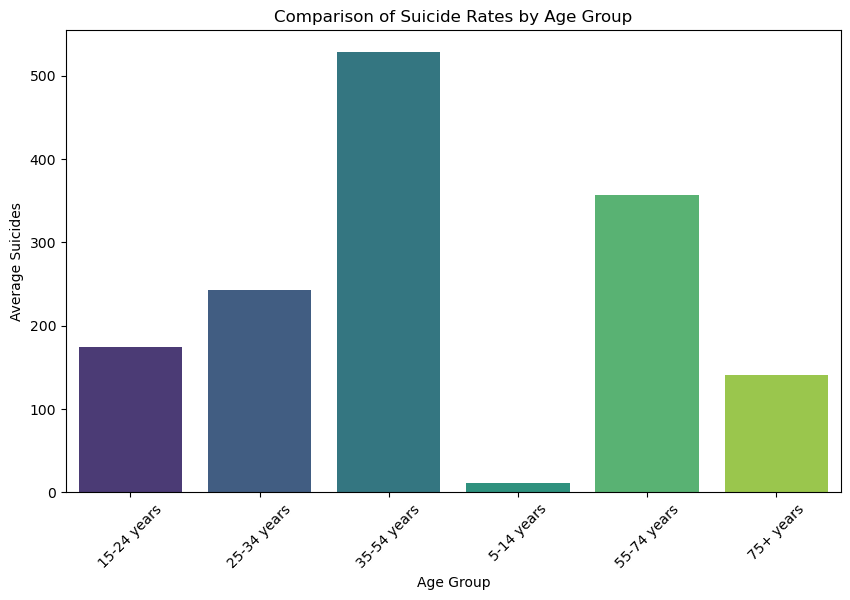

In [12]:
# 5. Compare suicide rates in different age ranges
plt.figure(figsize=(10, 6))
age_avg_suicides = df.groupby("age")["suicides_no"].mean().sort_index()
sns.barplot(x=age_avg_suicides.index, y=age_avg_suicides.values, palette="viridis")
plt.xlabel("Age Group")
plt.ylabel("Average Suicides")
plt.title("Comparison of Suicide Rates by Age Group")
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

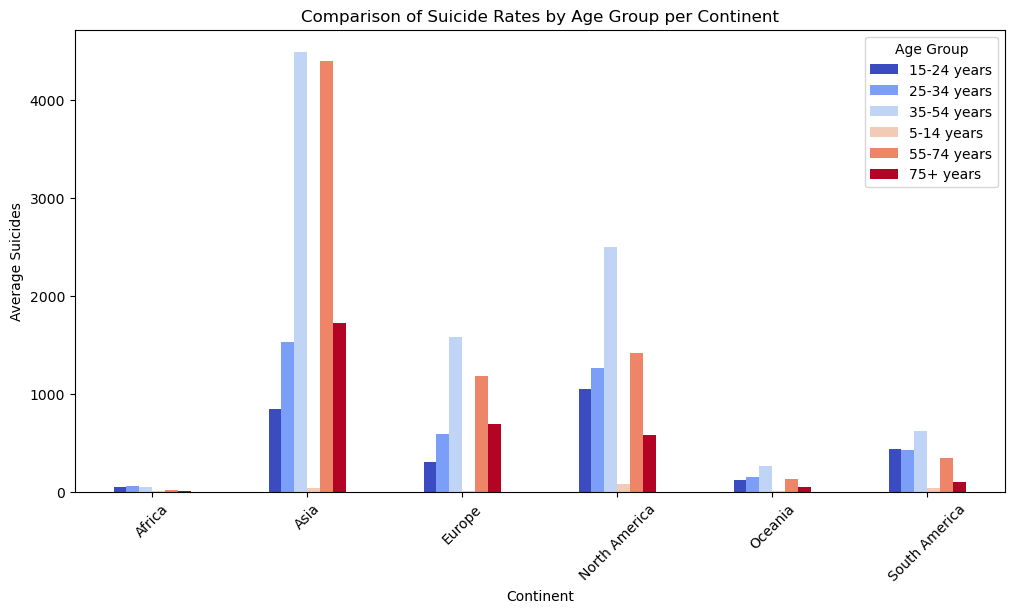

In [13]:
# 6. Compare suicide rates per continent by age group
continent_age_avg = df[df["continent"] != "Unknown"].groupby(["continent", "age"])["suicides_no"].mean().unstack()
plt.figure(figsize=(12, 6))
continent_age_avg.plot(kind="bar", figsize=(12, 6), colormap="coolwarm")
plt.xlabel("Continent")
plt.ylabel("Average Suicides")
plt.title("Comparison of Suicide Rates by Age Group per Continent")
plt.xticks(rotation=45)
plt.legend(title="Age Group")
plt.show()


In [15]:
# 7: Principal Component Analysis (PCA)

features = df[['suicides_no', 'population', 'gdp_per_capita ($)', 'year']]

features = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Display the PCA results
print(pca_df)

       Principal Component 1  Principal Component 2
0                  -0.822709               1.650098
1                  -0.827354               1.648909
2                  -0.832084               1.647785
3                  -0.889007               1.634573
4                  -0.838575               1.646179
...                      ...                    ...
27815               0.222518              -0.500208
27816              -0.426774              -0.649481
27817               0.036033              -0.543615
27818               0.000977              -0.551977
27819              -0.226042              -0.603850

[27820 rows x 2 columns]
